# SPC Control Card Chart

# Basics - display a control card

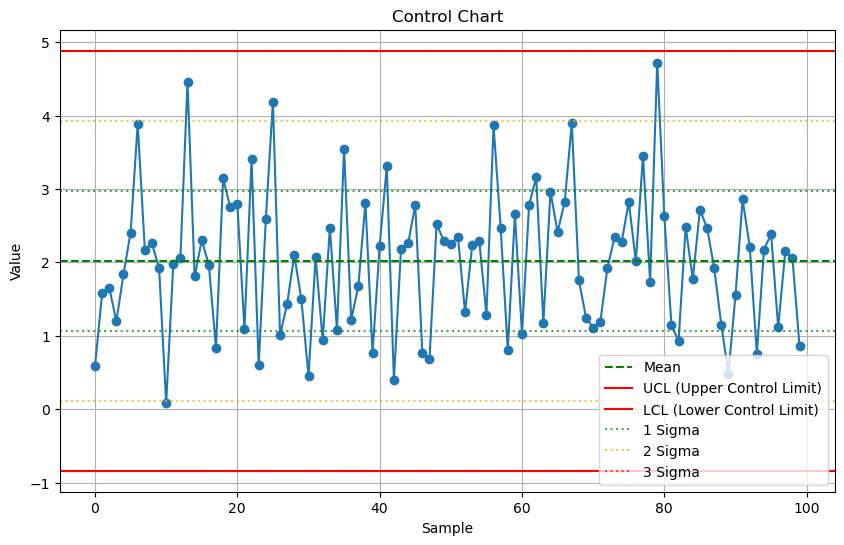

In [243]:
import numpy as np
import matplotlib.pyplot as plt

def generate_control_chart(data):
    # Calculate statistics for the control chart
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Use ddof=1 to estimate sample standard deviation (n-1)

    # Control limits for an I-MR (Individuals - Moving Range) control chart
    UCL = mean + 3 * std_dev
    LCL = mean - 3 * std_dev

    # Identify points outside control limits and 3 sigma
    out_of_control = (data > UCL) | (data < LCL)
    out_of_3sigma = (data > mean + 3 * std_dev) | (data < mean - 3 * std_dev)

    # Create the control chart
    plt.figure(figsize=(10, 6))
    plt.plot(data, marker='o', linestyle='-')
    plt.axhline(mean, color='g', linestyle='--', label='Mean')
    plt.axhline(UCL, color='r', linestyle='-', label='UCL (Upper Control Limit)')
    plt.axhline(LCL, color='r', linestyle='-', label='LCL (Lower Control Limit)')
    plt.axhline(mean + std_dev, color='g', linestyle=':', label='1 Sigma', alpha=0.7)
    plt.axhline(mean - std_dev, color='g', linestyle=':', alpha=0.7)
    plt.axhline(mean + 2 * std_dev, color='orange', linestyle=':', label='2 Sigma', alpha=0.7)
    plt.axhline(mean - 2 * std_dev, color='orange', linestyle=':', alpha=0.7)
    plt.axhline(mean + 3 * std_dev, color='red', linestyle=':', label='3 Sigma', alpha=0.7)
    plt.axhline(mean - 3 * std_dev, color='red', linestyle=':', alpha=0.7)

    # Mark points outside control limits with red parentheses
    for idx, val in enumerate(data):
        if out_of_control[idx]:
            plt.text(idx, val, f'({val})', color='red', ha='center', va='bottom')

    # Mark points outside 3 sigma with red parentheses
    for idx, val in enumerate(data):
        if out_of_3sigma[idx]:
            plt.text(idx, val, f'({val})', color='red', ha='center', va='top')

    plt.title('Control Chart')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate the dataset using the given formula
dataset_x = np.random.normal(loc=2, scale=1, size=100)
generate_control_chart(dataset_x)


# Basics - display a control card with data over control limits

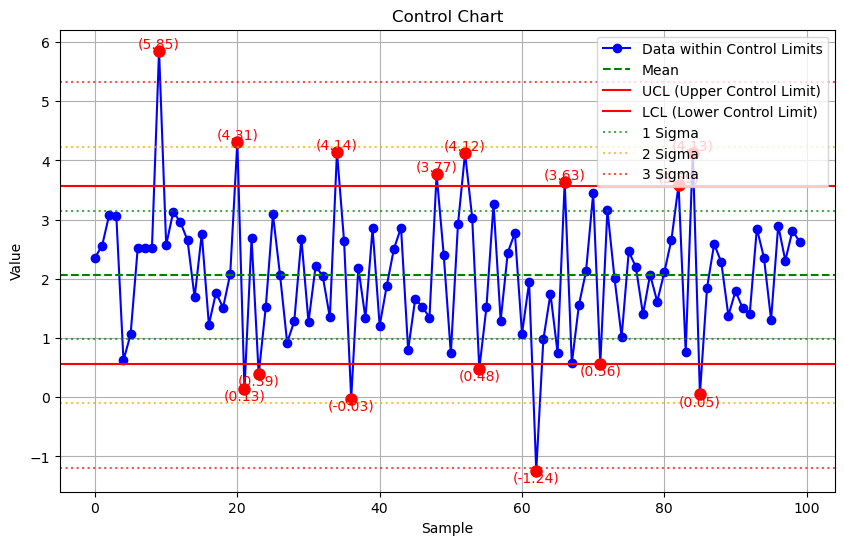

In [244]:
import numpy as np
import matplotlib.pyplot as plt

def generate_control_chart(data):
    # Calculate statistics for the control chart
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Use ddof=1 to estimate sample standard deviation (n-1)

    # Control limits for an I-MR (Individuals - Moving Range) control chart
    UCL = mean + 1.5
    LCL = mean - 1.5 

    # Create the control chart
    plt.figure(figsize=(10, 6))

    # Plot the points within control limits in blue
    plt.plot(data, marker='o', linestyle='-', color='blue', label='Data within Control Limits')

    # Mark points outside control limits with red parentheses
    for idx, val in enumerate(data):
        if val > UCL:
            marker_color = 'red'
            plt.plot(idx, val, marker='o', linestyle='None', color=marker_color, markersize=8)
            plt.text(idx, val, f'({val:.2f})', color=marker_color, ha='center', va='bottom')
        elif val < LCL:
            marker_color = 'red'
            plt.plot(idx, val, marker='o', linestyle='None', color=marker_color, markersize=8)
            plt.text(idx, val, f'({val:.2f})', color=marker_color, ha='center', va='top')

    plt.axhline(mean, color='g', linestyle='--', label='Mean')
    plt.axhline(UCL, color='r', linestyle='-', label='UCL (Upper Control Limit)')
    plt.axhline(LCL, color='r', linestyle='-', label='LCL (Lower Control Limit)')
    plt.axhline(mean + std_dev, color='g', linestyle=':', label='1 Sigma', alpha=0.7)
    plt.axhline(mean - std_dev, color='g', linestyle=':', alpha=0.7)
    plt.axhline(mean + 2 * std_dev, color='orange', linestyle=':', label='2 Sigma', alpha=0.7)
    plt.axhline(mean - 2 * std_dev, color='orange', linestyle=':', alpha=0.7)
    plt.axhline(mean + 3 * std_dev, color='red', linestyle=':', label='3 Sigma', alpha=0.7)
    plt.axhline(mean - 3 * std_dev, color='red', linestyle=':', alpha=0.7)

    plt.title('Control Chart')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate the dataset using the given formula
dataset_x = np.random.normal(loc=2, scale=1, size=100)
generate_control_chart(dataset_x)


# display graphs with 7 control card rules 

Rule 6: 4 consecutive points beyond 1 sigma triggered at index 5: [1.89 1.79 4.04 2.16]
Rule 6: 4 consecutive points beyond 1 sigma triggered at index 25: [4.29 4.19 1.87 3.92]


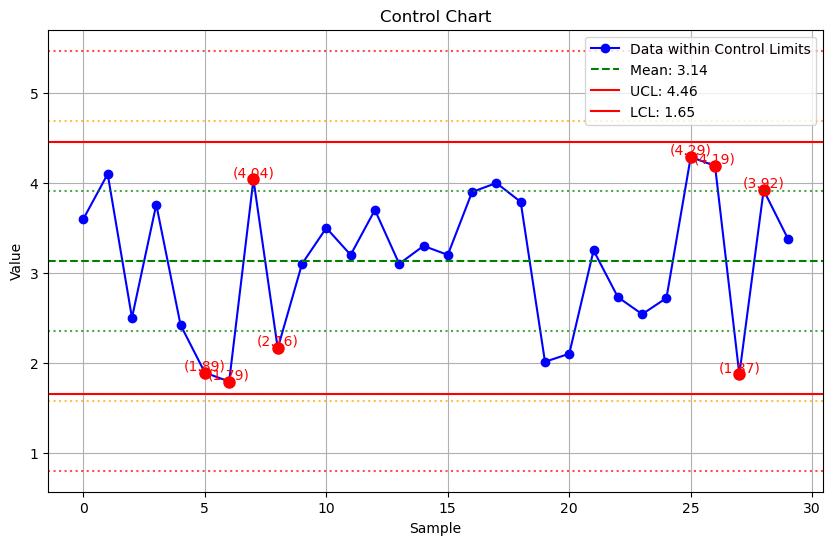

In [245]:
import numpy as np
import matplotlib.pyplot as plt

dataset_r1_triggered = [3.18, 3.73, 3.53, 2.92, 3.17, 3.85, 2.95, 3.52, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.64, 2.77, 2.92, 3.36, 2.65]

dataset_x = [3.6, 4.1, 2.5, 3.76, 2.42, 1.89, 1.79, 4.04, 2.16, 3.1, 3.5, 3.2, 3.7, 3.1,
             3.3, 3.2, 3.9, 4.00, 3.79, 2.01, 2.1, 3.25, 2.73, 2.54, 2.72, 4.29, 4.19, 1.87,
             3.92, 3.38]

dataset_r2_triggered_but_r7 = [3.18, 3.73, 3.53, 2.92, 3.17, 3.85, 2.95, 3.52, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.64, 2.77, 2.92, 3.36, 2.65]

dataset_r2_triggered = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
             3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
             3.62, 2.38]


dataset_r3_triggered = [3.2, 3.6, 3.4, 3.2, 2.8, 2.6, 2.4, 2.2, 3.4, 3.6, 3.8, 4.0, 3.8, 3.6, 3.4, 3.2, 
             3.0, 3.2, 3.3, 3.5, 3.5, 3.6, 3.4, 3.2, 3.1, 3.14, 3.16, 3.17, 3.18, 3.1]


ddataset_r4 = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
                    3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
                    3.62, 2.38, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0]
    
dataset_r5 = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
                    3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
                    3.62, 2.38, 5.0, 9.0]

dataset_r6 = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
                    3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
                    3.62, 2.38, 3.7, 3.3, 4.1, 3.9]

dataset_r7 = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
                    3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
                    3.62, 2.38, 3.6, 3.63, 3.58, 3.55, 3.61, 3.59, 3.64, 3.62, 3.57, 3.60, 3.59,
                    3.61, 3.60, 3.62]


# Calculate statistics for the control chart
mean = np.mean(dataset_x)
std_dev = np.std(dataset_x, ddof=1)  # Use ddof=1 to estimate sample standard deviation (n-1)
UCL = mean + 1.7 * std_dev
LCL = mean - 1.9 * std_dev

def check_control_rules(data):
    global UCL, LCL

    rules_violated = np.zeros(len(data), dtype=bool)

    # Rule 1: Points outside control limits
    for i in range(len(data)):
        if data[i] > UCL or data[i] < LCL:
            rules_violated[i] = True
            if np.any(rules_violated[i]): 
                print(f'Rule 1: Points outside control limits triggered at index {i}: {data[i]}')

    # Rule 2: 9 consecutive points on the same side of the mean
    for i in range(len(data) - 8):
        if np.all(data[i:i+9] > mean) or np.all(data[i:i+9] < mean):
            rules_violated[i:i+9] = True
            if np.any(rules_violated[i:i+9]): 
                print(f'Rule 2 : 9 consecutive points on the same side of the mean triggered at index {i}: {data[i:i+9]}')

    # Rule 3: 6 consecutive points increasing or decreasing
    for i in range(len(data) - 5):
        if np.all(np.diff(data[i:i+6]) > 0) or np.all(np.diff(data[i:i+6]) < 0):
            rules_violated[i:i+6] = True
            if np.any(rules_violated[i:i+6]): 
                print(f'Rule 3 : 6 consecutive points increasing or decreasing triggered at index {i}: {data[i:i+6]}')

    # Rule 4: 14 consecutive alternating points
    for i in range(len(data) - 13):
        if np.all(np.diff(data[i:i+15] > 0) != np.diff(data[i:i+15] < 0)):
            rules_violated[i:i+15] = True
            if np.any(rules_violated[i:i+15]): 
                print(f'Rule 4 : 4 consecutive alternating points triggered at index {i}: {data[i:i+15]}')

    # Rule 5: 2 consecutive points beyond 2 sigmas
    for i in range(len(data) - 1):
        if np.abs(data[i] - mean) > 2 * std_dev and np.abs(data[i+1] - mean) > 2 * std_dev:
            rules_violated[i:i+2] = True
            if np.any(rules_violated[i:i+2]): 
                print(f'Rule 5: 2 consecutive points beyond 2 sigmas triggered at index {i}: {data[i:i+2]}')

    # Rule 6: 4 consecutive points beyond 1 sigma
    for i in range(len(data) - 3):
        if np.all(np.abs(data[i:i+4] - mean) > std_dev):
            rules_violated[i:i+4] = True
            if np.any(rules_violated[i:i+4]): 
                print(f'Rule 6: 4 consecutive points beyond 1 sigma triggered at index {i}: {data[i:i+4]}')

    # Rule 7: 15 consecutive points in Zone A
    for i in range(len(data) - 14):
        if np.all(np.abs(data[i:i+15] - mean) <= std_dev) and not np.any(np.abs(data[i:i+15] - mean) > 2 * std_dev):
            rules_violated[i:i+15] = True
            if np.any(rules_violated[i:i+15]): 
                print(f'Rule 7: 15 consecutive points in Zone A triggered at index {i}: {data[i:i+15]}')

    return rules_violated

def generate_control_chart(data):
    global mean, std_dev, UCL, LCL

    # Create the control chart
    plt.figure(figsize=(10, 6))

    # Plot the points within control limits in blue
    plt.plot(data, marker='o', linestyle='-', color='blue', label='Data within Control Limits')

    # Mark points outside control limits with red parentheses
    rules_violated = check_control_rules(data)
    for idx, val in enumerate(data):
        if np.any(rules_violated[idx]):
            marker_color = 'red'
            plt.plot(idx, val, marker='o', linestyle='None', color=marker_color, markersize=8)
            plt.text(idx, val, f'({val:.2f})', color=marker_color, ha='center', va='bottom')

    plt.axhline(mean, color='g', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axhline(UCL, color='r', linestyle='-', label=f'UCL: {UCL:.2f}')
    plt.axhline(LCL, color='r', linestyle='-', label=f'LCL: {LCL:.2f}')
    plt.axhline(mean + std_dev, color='g', linestyle=':', alpha=0.7)
    plt.axhline(mean - std_dev, color='g', linestyle=':', alpha=0.7)
    plt.axhline(mean + 2 * std_dev, color='orange', linestyle=':', alpha=0.7)
    plt.axhline(mean - 2 * std_dev, color='orange', linestyle=':', alpha=0.7)
    plt.axhline(mean + 3 * std_dev, color='red', linestyle=':', alpha=0.7)
    plt.axhline(mean - 3 * std_dev, color='red', linestyle=':', alpha=0.7)

    plt.title('Control Chart')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Convert the dataset_x to a NumPy array
dataset_x = np.array(dataset_x)

# Generate the control chart
generate_control_chart(dataset_x)


# display graphs with 7 control card rules¶

mean 2.8153333333333332
UCL 4.315333333333333
LCL 1.3153333333333332
1sigma 3.8687603624849145
3sigma 5.975614420788077

Rule 1: Points outside control limits
Rule 2: 9 consecutive points on the same side of the mean
Rule 3: 6 consecutive points increasing or decreasing
Rule 4: 14 consecutive alternating points
Rule 5: 2 consecutive points beyond 2 sigmas
Rule 6: 4 consecutive points beyond 1 sigma

Rule 1: Points outside control limits triggered at index 5: 1.49
Rule 1: Points outside control limits triggered at index 6: -0.1
Rule 1: Points outside control limits triggered at index 20: 0.76
Rule 1: Points outside control limits triggered at index 27: 1.31
Rule 2 : 9 consecutive points on the same side of the mean triggered at index 9: [3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5]
Rule 2 : 9 consecutive points on the same side of the mean triggered at index 10: [3.5  3.5  3.5  3.5  3.5  3.5  3.5  3.5  3.29]
Rule 5: 2 consecutive points beyond 2 sigmas triggered at index 5: [ 1.49 -0.1 ]
Rule 6

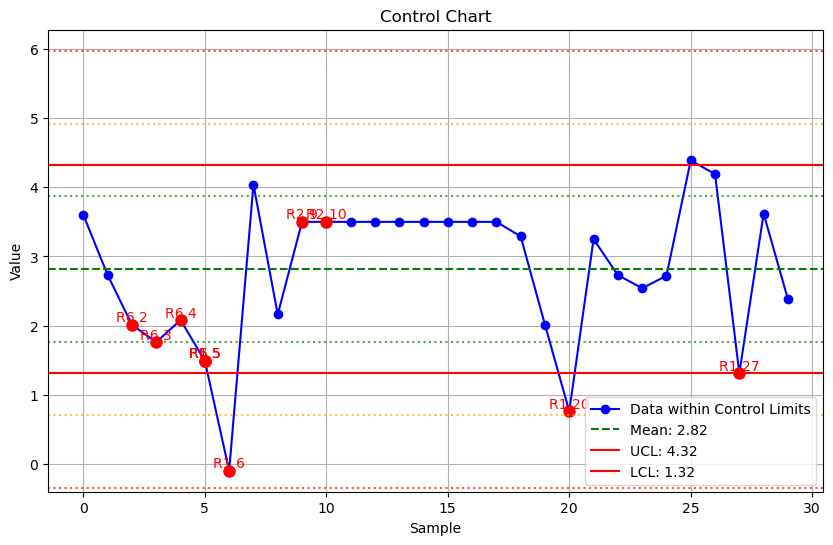

In [246]:
import numpy as np
import matplotlib.pyplot as plt


dataset_r1_triggered = [3.18, 3.73, 3.53, 2.92, 3.17, 3.85, 2.95, 3.52, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.64, 2.77, 2.92, 3.36, 2.65]

dataset_r2_triggered_but_r7 = [3.18, 3.73, 3.53, 2.92, 3.17, 3.85, 2.95, 3.52, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.64, 2.77, 2.92, 3.36, 2.65]

dataset_r2_triggered = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
             3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
             3.62, 2.38]


dataset_r3_triggered = [3.2, 3.6, 3.4, 3.2, 2.8, 2.6, 2.4, 2.2, 3.4, 3.6, 3.8, 4.0, 3.8, 3.6, 3.4, 3.2, 
             3.0, 3.2, 3.3, 3.5, 3.5, 3.6, 3.4, 3.2, 3.1, 3.14, 3.16, 3.17, 3.18, 3.1]

dataset_x = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
             3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
             3.62, 2.38]


ddataset_r4 = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
                    3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
                    3.62, 2.38, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0]
    
dataset_r5 = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
                    3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
                    3.62, 2.38, 5.0, 9.0]

dataset_r6 = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
                    3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
                    3.62, 2.38, 3.7, 3.3, 4.1, 3.9]

dataset_r7 = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
                    3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
                    3.62, 2.38, 3.6, 3.63, 3.58, 3.55, 3.61, 3.59, 3.64, 3.62, 3.57, 3.60, 3.59,
                    3.61, 3.60, 3.62]


def check_control_rules(data):
    global UCL, LCL

    rules_violated = np.zeros(len(data), dtype=bool)
    violated_rules = []

    # Rule 1: Points outside control limits
    for i in range(len(data)):
        if data[i] > UCL or data[i] < LCL:
            rules_violated[i] = True
            if np.any(rules_violated[i]): 
                violated_rules.append(f'R1 {i}')
                print(f'Rule 1: Points outside control limits triggered at index {i}: {data[i]}')

    # Rule 2: 9 consecutive points on the same side of the mean
    for i in range(len(data) - 8):
        if np.all(data[i:i+9] > mean) or np.all(data[i:i+9] < mean):
            rules_violated[i:i+9] = True
            if np.any(rules_violated[i:i+9]): 
                violated_rules.append(f'R2 {i}')
                print(f'Rule 2 : 9 consecutive points on the same side of the mean triggered at index {i}: {data[i:i+9]}')
                
    # Rule 3: 6 consecutive points increasing or decreasing
    for i in range(len(data) - 5):
        if np.all(np.diff(data[i:i+6]) > 0) or np.all(np.diff(data[i:i+6]) < 0):
            rules_violated[i:i+6] = True
            if np.any(rules_violated[i:i+6]): 
                violated_rules.append(f'R3 {i}')
                print(f'Rule 3 : 6 consecutive points increasing or decreasing triggered at index {i}: {data[i:i+6]}')

    # Rule 4: 14 consecutive alternating points
    for i in range(len(data) - 13):
        if np.all(np.diff(data[i:i+15] > 0) != np.diff(data[i:i+15] < 0)):
            rules_violated[i:i+15] = True
            if np.any(rules_violated[i:i+15]): 
                violated_rules.append(f'R4: {i}')
                print(f'Rule 4 : 4 consecutive alternating points triggered at index {i}: {data[i:i+15]}')


    # Rule 5: 2 consecutive points beyond 2 sigmas
    for i in range(len(data) - 1):
        if np.abs(data[i] - mean) > 2 * std_dev and np.abs(data[i+1] - mean) > 2 * std_dev:
            rules_violated[i:i+2] = True
            if np.any(rules_violated[i:i+2]): 
                violated_rules.append(f'R5 {i}')
                print(f'Rule 5: 2 consecutive points beyond 2 sigmas triggered at index {i}: {data[i:i+2]}')

     # Rule 6: 4 consecutive points beyond 1 sigma
    for i in range(len(data) - 3):
        if np.all(np.abs(data[i:i+4] - mean) > std_dev):
            rules_violated[i:i+4] = True
            if np.any(rules_violated[i:i+4]): 
                violated_rules.append(f'R6 {i}')
                print(f'Rule 6: 4 consecutive points beyond 1 sigma triggered at index {i}: {data[i:i+4]}')
   

    # Rule 7: 15 consecutive points in Zone A
    # for i in range(len(data) - 14):
    #     if np.all(np.abs(data[i:i+15] - mean) <= 2 * std_dev) and not np.any(np.abs(data[i:i+15] - mean) > std_dev):
    #         rules_violated[i:i+15] = True
    #         if np.any(rules_violated[i:i+15]):
    #             violated_rules.append(f'R7 {i}')
    #             print(f'Rule 7: 15 consecutive points in Zone A triggered at index {i}: {data[i:i+15]}')


    return violated_rules

def generate_control_chart(data):
    # global mean, std_dev, UCL, LCL
    
    # Calculate statistics for the control chart
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Use ddof=1 to estimate sample standard deviation (n-1)
    UCL = mean + 1.5
    LCL = mean - 1.5

    print("mean", mean)
    print("UCL", UCL)
    print("LCL", LCL)
    print("1sigma", mean+std_dev)
    print("3sigma", mean+3*std_dev)
    print("")
    print("Rule 1: Points outside control limits")
    print("Rule 2: 9 consecutive points on the same side of the mean")
    print("Rule 3: 6 consecutive points increasing or decreasing")
    print("Rule 4: 14 consecutive alternating points")
    print("Rule 5: 2 consecutive points beyond 2 sigmas")
    print("Rule 6: 4 consecutive points beyond 1 sigma")
    # print("Rule 7: 15 consecutive points in Zone A")
    print("")
    
# Create the control chart
    plt.figure(figsize=(10, 6))

    # Plot the points within control limits in blue
    plt.plot(data, marker='o', linestyle='-', color='blue', label='Data within Control Limits')

    # Mark points outside control limits with red parentheses
    violated_rules = check_control_rules(data)
    for rule in violated_rules:
        index = int(rule.split()[-1])
        val = data[index]
        marker_color = 'red'
        plt.plot(index, val, marker='o', linestyle='None', color=marker_color, markersize=8)
        plt.text(index, val, rule, color=marker_color, ha='center', va='bottom')

    plt.axhline(mean, color='g', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axhline(UCL, color='r', linestyle='-', label=f'UCL: {UCL:.2f}')
    plt.axhline(LCL, color='r', linestyle='-', label=f'LCL: {LCL:.2f}')
    plt.axhline(mean + std_dev, color='g', linestyle=':', alpha=0.7)
    plt.axhline(mean - std_dev, color='g', linestyle=':', alpha=0.7)
    plt.axhline(mean + 2 * std_dev, color='orange', linestyle=':', alpha=0.7)
    plt.axhline(mean - 2 * std_dev, color='orange', linestyle=':', alpha=0.7)
    plt.axhline(mean + 3 * std_dev, color='red', linestyle=':', alpha=0.7)
    plt.axhline(mean - 3 * std_dev, color='red', linestyle=':', alpha=0.7)

    plt.title('Control Chart')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


# Convert the dataset_x to a NumPy array
dataset_x = np.array(dataset_x)

# Generate the control chart
generate_control_chart(dataset_x)



Rule 1: Points outside control limits
Rule 2: 9 consecutive points on the same side of the mean
Rule 3: 6 consecutive points increasing or decreasing
Rule 4: 14 consecutive alternating points
Rule 5: 2 consecutive points beyond 2 sigmas
Rule 6: 4 consecutive points beyond 1 sigma

Rule 5: 2 consecutive points beyond 2 sigmas triggered at index 25: [2.2 2.1]


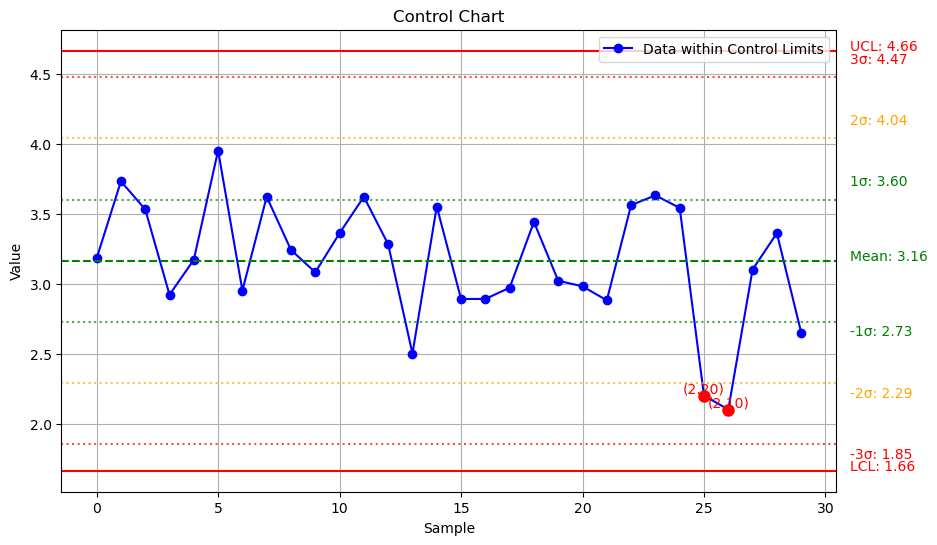

In [248]:
import numpy as np
import matplotlib.pyplot as plt

# data set all good
dataset_good = [3.18, 3.73, 3.53, 2.92, 3.17, 3.95, 2.95, 3.52, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.2, 2.77, 3.1, 3.36, 2.65]

# Rule 1: Points outside control limits
dataset_r1_triggered = [3.18, 4.71, 3.53, 2.92, 3.17, 3.95, 2.95, 3.52, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 2.54, 1.1, 2.77, 3.1, 3.36, 2.65]

# Rule 2: 9 consecutive points on the same side of the mean
dataset_r2_triggered_but_r7 = [3.18, 3.73, 3.53, 2.92, 3.17, 3.85, 2.95, 3.52, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.64, 2.77, 2.92, 3.36, 2.65]

# Rule 3: 6 consecutive points increasing or decreasing
dataset_r3_triggered = [3.2, 3.6, 3.4, 3.2, 2.8, 2.6, 2.4, 2.2, 3.4, 3.6, 3.8, 4.0, 3.8, 3.6, 3.4, 3.2, 
             3.0, 3.2, 3.3, 3.5, 3.5, 3.6, 3.4, 3.2, 3.1, 3.14, 3.16, 3.17, 3.18, 3.1]

# Rule 6: 4 consecutive points beyond 1 sigma
dataset_r6_triggered = [3.6, 4.1, 2.5, 3.76, 2.42, 1.89, 1.79, 4.04, 2.16, 3.1, 3.5, 3.2, 3.7, 3.1,
             3.3, 3.2, 3.9, 4.00, 3.79, 2.01, 2.1, 3.25, 2.73, 2.54, 2.72, 4.29, 4.19, 1.87,
             3.92, 3.38]

# Rule 7: 15 consecutive points in Zone A
dataset_r7_triggered = [3.18, 3.73, 3.53, 2.92, 3.17, 3.95, 2.95, 3.62, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.2, 2.3, 2.2, 3.36, 2.65]

# Rule 4: 14 consecutive alternating points
# Rule 5: 2 consecutive points beyond 2 sigmas

dataset_x = [3.18, 3.73, 3.53, 2.92, 3.17, 3.95, 2.95, 3.62, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 2.5, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.2, 2.1, 3.10, 3.36, 2.65]

    
dataset_r7 = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
                    3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
                    3.62, 2.38, 3.6, 3.63, 3.58, 3.55, 3.61, 3.59, 3.64, 3.62, 3.57, 3.60, 3.59,
                    3.61, 3.60, 3.62]

def check_control_rules(data):
    global UCL, LCL

    rules_violated = np.zeros(len(data), dtype=bool)

# Rule 1: Points outside control limits
    for i in range(len(data)):
        if data[i] > UCL or data[i] < LCL:
            rules_violated[i] = True
            if np.any(rules_violated[i]): 
                print(f'Rule 1: Points outside control limits triggered at index {i}: {data[i]}')

    # Rule 2: 9 consecutive points on the same side of the mean
    for i in range(len(data) - 8):
        if np.all(data[i:i+9] > mean) or np.all(data[i:i+9] < mean):
            rules_violated[i:i+9] = True
            if np.any(rules_violated[i:i+9]): 
                print(f'Rule 2 : 9 consecutive points on the same side of the mean triggered at index {i}: {data[i:i+9]}')

    # Rule 3: 6 consecutive points increasing or decreasing
    for i in range(len(data) - 5):
        if np.all(np.diff(data[i:i+6]) > 0) or np.all(np.diff(data[i:i+6]) < 0):
            rules_violated[i:i+6] = True
            if np.any(rules_violated[i:i+6]): 
                print(f'Rule 3 : 6 consecutive points increasing or decreasing triggered at index {i}: {data[i:i+6]}')

    # Rule 4: 14 consecutive alternating points
    for i in range(len(data) - 13):
        if np.all(np.diff(data[i:i+15] > 0) != np.diff(data[i:i+15] < 0)):
            rules_violated[i:i+15] = True
            if np.any(rules_violated[i:i+15]): 
                print(f'Rule 4 : 4 consecutive alternating points triggered at index {i}: {data[i:i+15]}')

  # Rule 5: 2 consecutive points beyond 2 sigmas
    for i in range(len(data) - 1):
        if (np.abs(data[i] - mean) > 1 * std_dev) & (np.abs(data[i+1] - mean) > 1 * std_dev):
            rules_violated[i:i+2] = True
            if np.any(rules_violated[i:i+2]): 
                print(f'Rule 5: 2 consecutive points beyond 2 sigmas triggered at index {i}: {data[i:i+2]}')

    # Rule 6: 4 consecutive points beyond 1 sigma
    for i in range(len(data) - 3):
        if np.all(np.abs(data[i:i+4] - mean) > std_dev):
            rules_violated[i:i+4] = True
            if np.any(rules_violated[i:i+4]): 
                print(f'Rule 6: 4 consecutive points beyond 1 sigma triggered at index {i}: {data[i:i+4]}')

    # Rule 7: 15 consecutive points in Zone A
    # for i in range(len(data) - 14):
    #    if np.all(np.abs(data[i:i+15] - mean) <= std_dev) and not np.any(np.abs(data[i:i+15] - mean) > 1 * std_dev):
    #        rules_violated[i:i+15] = True
    #        if np.all(rules_violated[i:i+15]):  # Utiliser np.all ici au lieu de np.any
    #            print(f'Rule 7: 15 consecutive points at index {i}: {data[i:i+15]}')


    return rules_violated

def generate_control_chart(data):
    # global mean, std_dev, UCL, LCL
    
    # Calculate statistics for the control chart
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Use ddof=1 to estimate sample standard deviation (n-1)
    UCL = mean + 1.5 
    LCL = mean - 1.5 

    # print("mean", mean)    
    # print(f"UCL {UCL:.2f}")
    # print(f"LCL {LCL:.2f}")

    # print(f"1sigma+ {mean + std_dev:.2f}")
    # print(f"1sigma+ {mean - std_dev:.2f}")
    # print(f"2sigma+ {mean + 2*std_dev:.2f}")
    # print(f"2sigma+ {mean - 2*std_dev:.2f}")
    # print(f"3sigma+ {mean + 3*std_dev:.2f}")
    # print(f"3sigma+ {mean - 3*std_dev:.2f}")
    
    print("")
    print("Rule 1: Points outside control limits")
    print("Rule 2: 9 consecutive points on the same side of the mean")
    print("Rule 3: 6 consecutive points increasing or decreasing")
    print("Rule 4: 14 consecutive alternating points")
    print("Rule 5: 2 consecutive points beyond 2 sigmas")
    print("Rule 6: 4 consecutive points beyond 1 sigma")
    # print("Rule 7: 15 consecutive points in Zone A")
    print("")
    

    # Create the control chart
    plt.figure(figsize=(10, 6))

    # Plot the points within control limits in blue
    plt.plot(data, marker='o', linestyle='-', color='blue', label='Data within Control Limits')

    # Mark points outside control limits with red parentheses
    rules_violated = check_control_rules(data)
    for idx, val in enumerate(data):
        if np.any(rules_violated[idx]):
            marker_color = 'red'
            plt.plot(idx, val, marker='o', linestyle='None', color=marker_color, markersize=8)
            plt.text(idx, val, f'({val:.2f})', color=marker_color, ha='center', va='bottom')
          
    plt.axhline(mean, color='g', linestyle='--')
    plt.text(len(data) + 1, mean, f'Mean: {mean:.2f}', color='g')
    
    plt.axhline(UCL, color='r', linestyle='-')
    plt.text(len(data) + 1, UCL, f'UCL: {UCL:.2f}', color='r')
    
    plt.axhline(LCL, color='r', linestyle='-')
    plt.text(len(data) + 1, LCL, f'LCL: {LCL:.2f}', color='r')
    
    plt.axhline(mean + std_dev, color='g', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean + std_dev + 0.1, f'1σ: {mean + std_dev:.2f}', color='g')
    plt.axhline(mean - std_dev, color='g', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean - std_dev - 0.1, f'-1σ: {mean - std_dev:.2f}', color='g')
  
    plt.axhline(mean + 2 * std_dev, color='orange', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean + 2 * std_dev + 0.1, f'2σ: {mean + 2 * std_dev:.2f}', color='orange')
    plt.axhline(mean - 2 * std_dev, color='orange', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean - 2 * std_dev - 0.1, f'-2σ: {mean - 2 * std_dev:.2f}', color='orange')

    plt.axhline(mean + 3 * std_dev, color='red', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean + 3 * std_dev + 0.1, f'3σ: {mean + 3 * std_dev:.2f}', color='red')
    plt.axhline(mean - 3 * std_dev, color='red', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean - 3 * std_dev - 0.1, f'-3σ: {mean - 3 * std_dev:.2f}', color='red')
            
    # Display legendes
    plt.title('Control Chart')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()    
    plt.grid(True)
    plt.show()

# Convert the dataset_x to a NumPy array
dataset_x = np.array(dataset_x)

# Generate the control chart
generate_control_chart(dataset_x)


# last good graph


Rule 1: Points outside control limits
Rule 2: 9 consecutive points on the same side of the mean
Rule 3: 6 consecutive points increasing or decreasing
Rule 4: 14 consecutive alternating points
Rule 5: 2 consecutive points beyond 2 sigmas
Rule 6: 4 consecutive points beyond 1 sigma

Rule 5: 6 consecutive points increasing or decreasing at index 1: 3.6
Rule 5: 6 consecutive points increasing or decreasing at index 2: 3.4
Rule 5: 6 consecutive points increasing or decreasing at index 11: 4.0


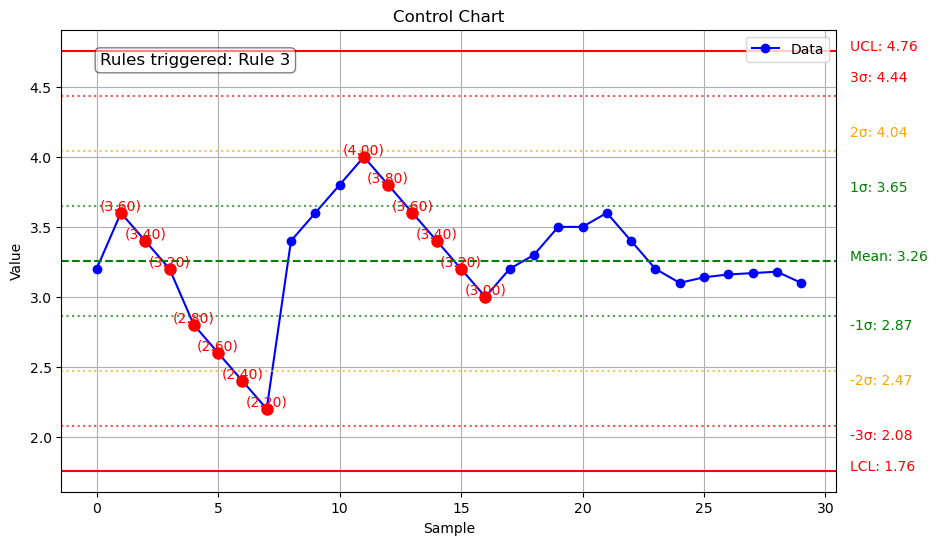

In [253]:
import numpy as np
import matplotlib.pyplot as plt

# data set all good
dataset_good = [3.18, 3.73, 3.53, 2.92, 3.17, 3.95, 2.95, 3.52, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.2, 2.77, 3.1, 3.36, 2.65]

# Rule 1: Points outside control limits
dataset_r1_triggered = [3.18, 4.71, 3.53, 2.92, 3.17, 3.95, 2.95, 3.52, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 2.54, 1.1, 2.77, 3.1, 3.36, 2.65]

# Rule 2: 9 consecutive points on the same side of the mean
dataset_r2_triggered_but_r7 = [3.18, 3.73, 3.53, 2.92, 3.17, 3.85, 2.95, 3.52, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.64, 2.77, 2.92, 3.36, 2.65]

# Rule 3: 6 consecutive points increasing or decreasing
dataset_x = [3.2, 3.6, 3.4, 3.2, 2.8, 2.6, 2.4, 2.2, 3.4, 3.6, 3.8, 4.0, 3.8, 3.6, 3.4, 3.2, 
             3.0, 3.2, 3.3, 3.5, 3.5, 3.6, 3.4, 3.2, 3.1, 3.14, 3.16, 3.17, 3.18, 3.1]

# Rule 6: 4 consecutive points beyond 1 sigma
dataset_r6_triggered = [3.6, 4.1, 2.5, 3.76, 2.42, 1.89, 1.79, 4.04, 2.16, 3.1, 3.5, 3.2, 3.7, 3.1,
             3.3, 3.2, 3.9, 4.00, 3.79, 2.01, 2.1, 3.25, 2.73, 2.54, 2.72, 4.29, 4.19, 1.87,
             3.92, 3.38]

# Rule 7: 15 consecutive points in Zone A
dataset_r7_triggered = [3.18, 3.73, 3.53, 2.92, 3.17, 3.95, 2.95, 3.62, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 3.04, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.2, 2.3, 2.2, 3.36, 2.65]

# Rule 4: 14 consecutive alternating points
# Rule 5: 2 consecutive points beyond 2 sigmas

dataset_y = [3.18, 3.73, 3.53, 2.92, 3.17, 3.95, 2.95, 3.62, 3.24, 3.08, 3.36, 
                            3.62, 3.28, 2.5, 3.55, 2.89, 2.89, 2.97, 3.44, 3.02, 2.98, 2.88, 
                            3.56, 3.63, 3.54, 2.2, 2.1, 3.10, 3.36, 2.65]

    
dataset_r7 = [3.6, 2.73, 2.01, 1.76, 2.08, 1.49, -0.1, 4.04, 2.16, 3.5, 3.5, 3.5, 3.5, 3.5,
                    3.5, 3.5, 3.5, 3.5, 3.29, 2.01, 0.76, 3.25, 2.73, 2.54, 2.72, 4.39, 4.19, 1.31,
                    3.62, 2.38, 3.6, 3.63, 3.58, 3.55, 3.61, 3.59, 3.64, 3.62, 3.57, 3.60, 3.59,
                    3.61, 3.60, 3.62]


def check_control_rules(data):
    # global UCL, LCL

    rules_violated = np.zeros((len(data), 6), dtype=bool)

    # Rule 1: Points outside control limits
    for i in range(len(data)):
        if data[i] > UCL or data[i] < LCL:
            rules_violated[i, 0] = True
            print(f'Rule 1: Points outside control limits triggered at index {i}: {data[i]}')

    # Rule 1: Points outside control limits
    # for i in range(len(data)):
    #     if data[i] > UCL or data[i] < LCL:
    #         rules_violated[i] = True
    #         if np.any(rules_violated[i]): 
    #             print(f'Rule 1: Points outside control limits triggered at index {i}: {data[i]}')

    # Rule 2: 9 consecutive points on the same side of the mean
    for i in range(len(data) - 8):
        if np.all(data[i:i+9] > mean) or np.all(data[i:i+9] < mean):
            rules_violated[i:i+9, 1] = True

    # Rule 3: 6 consecutive points increasing or decreasing
    for i in range(len(data) - 5):
        if np.all(np.diff(data[i:i+6]) > 0) or np.all(np.diff(data[i:i+6]) < 0):
            rules_violated[i:i+6, 2] = True
            print(f'Rule 5: 6 consecutive points increasing or decreasing at index {i}: {data[i]}')


    # Rule 4: 14 consecutive alternating points
    for i in range(len(data) - 13):
        if np.all(np.diff(data[i:i+15] > 0) != np.diff(data[i:i+15] < 0)):
            rules_violated[i:i+15, 3] = True

    # Rule 5: 2 consecutive points beyond 2 sigmas
    for i in range(len(data) - 1):
        if (np.abs(data[i] - mean) > 1 * std_dev) & (np.abs(data[i+1] - mean) > 1 * std_dev):
            rules_violated[i:i+2, 4] = True
            print(f'Rule 5: 2 consecutive points beyond 2 sigmas at index {i}: {data[i]}')

    # Rule 6: 4 consecutive points beyond 1 sigma
    for i in range(len(data) - 3):
        if np.all(np.abs(data[i:i+4] - mean) > std_dev):
            rules_violated[i:i+4, 5] = True

    # Rule 7: 15 consecutive points in Zone A
    # for i in range(len(data) - 14):
    #     if np.all(np.abs(data[i:i+15] - mean) <= std_dev) and not np.any(np.abs(data[i:i+15] - mean) > 2 * std_dev)
    #         rules_violated[i:i+15] = True
    #         print(f'Rule 7: 15 consecutive points in Zone A triggered at index {i}: {data[i:i+15]}')

    return rules_violated


def generate_control_chart(data):
    # global mean, std_dev, UCL, LCL
    
    # Calculate statistics for the control chart
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Use ddof=1 to estimate sample standard deviation (n-1)
    UCL = mean + 1.5 
    LCL = mean - 1.5 

    # print("mean", mean)    
    # print(f"UCL {UCL:.2f}")
    # print(f"LCL {LCL:.2f}")

    # print(f"1sigma+ {mean + std_dev:.2f}")
    # print(f"1sigma+ {mean - std_dev:.2f}")
    # print(f"2sigma+ {mean + 2*std_dev:.2f}")
    # print(f"2sigma+ {mean - 2*std_dev:.2f}")
    # print(f"3sigma+ {mean + 3*std_dev:.2f}")
    # print(f"3sigma+ {mean - 3*std_dev:.2f}")
    
    print("")
    print("Rule 1: Points outside control limits")
    print("Rule 2: 9 consecutive points on the same side of the mean")
    print("Rule 3: 6 consecutive points increasing or decreasing")
    print("Rule 4: 14 consecutive alternating points")
    print("Rule 5: 2 consecutive points beyond 2 sigmas")
    print("Rule 6: 4 consecutive points beyond 1 sigma")
    # print("Rule 7: 15 consecutive points in Zone A")
    print("")
    
    # Create the control chart
    plt.figure(figsize=(10, 6))

    # Plot the points within control limits in blue
    plt.plot(data, marker='o', linestyle='-', color='blue', label='Data')

# Mark points outside control limits with red parentheses and annotate violated rules
    rules_violated = check_control_rules(data)
    violated_rules = []  # Declare violated_rules list outside the loop
    already_violated = set()  # Set to keep track of already violated rules
    for idx, val in enumerate(data):
        if np.any(rules_violated[idx]):
            marker_color = 'red'
            plt.plot(idx, val, marker='o', linestyle='None', color=marker_color, markersize=8)
            plt.text(idx, val, f'({val:.2f})', color=marker_color, ha='center', va='bottom')

            # Annotate the violated rules
            violated_text = []
            if rules_violated[idx][0] and "Rule 1" not in already_violated:
                violated_rules.append("Rule 1")
                violated_text.append("R1")
                already_violated.add("Rule 1")
            if rules_violated[idx][1] and "Rule 2" not in already_violated:
                violated_rules.append("Rule 2")
                violated_text.append("R2")
                already_violated.add("Rule 2")
            if rules_violated[idx][2] and "Rule 3" not in already_violated:
                violated_rules.append("Rule 3")
                violated_text.append("R3")
                already_violated.add("Rule 3")
            if rules_violated[idx][3] and "Rule 4" not in already_violated:
                violated_rules.append("Rule 4")
                violated_text.append("R4")
                already_violated.add("Rule 4")
            if rules_violated[idx][4] and "Rule 5" not in already_violated:
                violated_rules.append("Rule 5")
                violated_text.append("R5")
                already_violated.add("Rule 5")
            if rules_violated[idx][5] and "Rule 6" not in already_violated:
                violated_rules.append("Rule 6")
                violated_text.append("R6")
                already_violated.add("Rule 6")

    # Add the violated rules to the title of the graph
    if violated_rules:
        title = 'Rules triggered: ' + ', '.join(violated_rules)
    else:
        title = 'Control Chart - All Rules Satisfied'
        
    # Add the violated rules to the graph as a text box
    if violated_rules:
        text_box = plt.text(0.05, 0.95, title, transform=plt.gca().transAxes, fontsize=12, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    else:
        title = 'Control Chart - All Rules Satisfied'
    
    plt.axhline(mean, color='g', linestyle='--')
    plt.text(len(data) + 1, mean, f'Mean: {mean:.2f}', color='g')
    
    plt.axhline(UCL, color='r', linestyle='-')
    plt.text(len(data) + 1, UCL, f'UCL: {UCL:.2f}', color='r')
    
    plt.axhline(LCL, color='r', linestyle='-')
    plt.text(len(data) + 1, LCL, f'LCL: {LCL:.2f}', color='r')
    
    plt.axhline(mean + std_dev, color='g', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean + std_dev + 0.1, f'1σ: {mean + std_dev:.2f}', color='g')
    plt.axhline(mean - std_dev, color='g', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean - std_dev - 0.1, f'-1σ: {mean - std_dev:.2f}', color='g')
  
    plt.axhline(mean + 2 * std_dev, color='orange', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean + 2 * std_dev + 0.1, f'2σ: {mean + 2 * std_dev:.2f}', color='orange')
    plt.axhline(mean - 2 * std_dev, color='orange', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean - 2 * std_dev - 0.1, f'-2σ: {mean - 2 * std_dev:.2f}', color='orange')

    plt.axhline(mean + 3 * std_dev, color='red', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean + 3 * std_dev + 0.1, f'3σ: {mean + 3 * std_dev:.2f}', color='red')
    plt.axhline(mean - 3 * std_dev, color='red', linestyle=':', alpha=0.7)
    plt.text(len(data) + 1, mean - 3 * std_dev - 0.1, f'-3σ: {mean - 3 * std_dev:.2f}', color='red')
            
    # Display legendes
    plt.title('Control Chart')  # Utilisez la variable "title" pour afficher les règles violées
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()    
    plt.grid(True)
    plt.show()

# Convert the dataset_x to a NumPy array
dataset_x = np.array(dataset_x)

# Generate the control chart
generate_control_chart(dataset_x)

# Control card graph timer updated with SPC controls

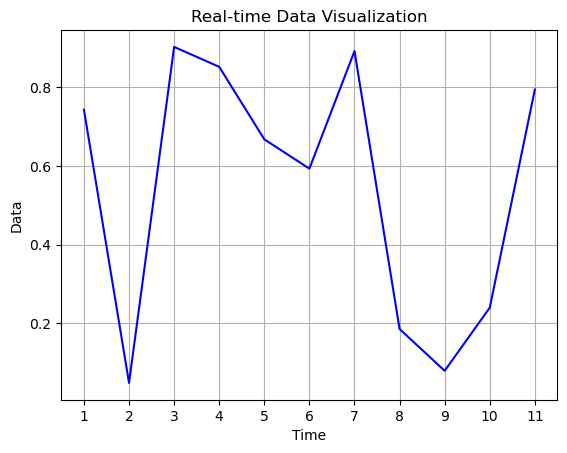

KeyboardInterrupt: 

In [267]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Function to generate random data
def generate_data():
    return np.random.rand()

# Function to update and display the plot in real-time
def update_plot(num_data_points):
    x_data = np.arange(1, num_data_points + 1)
    y_data = [generate_data() for _ in range(num_data_points)]

    plt.plot(x_data, y_data, 'b-')
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title('Real-time Data Visualization')
    plt.xticks(x_data)
    plt.grid(True)
    plt.show()

# Set the number of data points to display
num_data_points = 50

# Create the animation loop
for i in range(num_data_points):
    update_plot(i)
    time.sleep(2)
    clear_output(wait=True)


# Dynamic Control card graph incl. moving average 

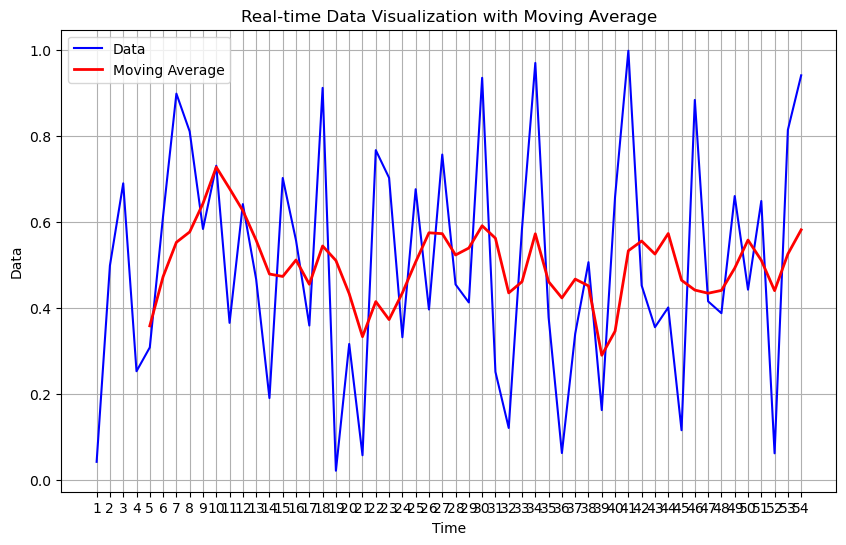

<Figure size 640x480 with 0 Axes>

In [272]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Function to generate random data
def generate_data():
    return np.random.rand()

# Function to calculate the moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Function to update and display the plot in real-time
def update_plot(num_data_points, window_size):
    x_data = np.arange(1, num_data_points + 1)
    y_data = [generate_data() for _ in range(num_data_points)]
    moving_avg = moving_average(y_data, window_size)

    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'b-', label='Data')
    plt.plot(x_data[window_size-1:], moving_avg, 'r-', linewidth=2, label='Moving Average')
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title('Real-time Data Visualization with Moving Average')
    plt.xticks(x_data)
    plt.grid(True)
    plt.legend()
    plt.show()

# Set the number of data points to display and window size for moving average
num_data_points = 20
window_size = 5

# Create the animation loop
for i in range(num_data_points):
    update_plot(i+window_size, window_size)
    display(plt.gcf())
    time.sleep(1)
    clear_output(wait=True)
    plt.close()


# Dynamic Control card graph timer updated with SPC controls

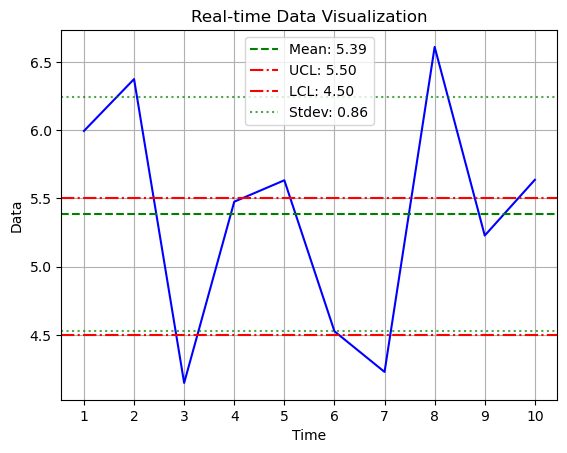

<Figure size 640x480 with 0 Axes>

In [279]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Function to generate random data from a normal distribution
def generate_data(mean, std_dev):
    return np.random.normal(mean, std_dev)

# Function to update and display the plot in real-time
def update_plot(num_data_points, mean, std_dev, UCL, LCL):
    x_data = np.arange(1, num_data_points + 1)
    y_data = [generate_data(mean, std_dev) for _ in range(num_data_points)]
    data_mean = np.mean(y_data)
    data_std_dev = np.std(y_data, ddof=1)

    plt.plot(x_data, y_data, 'b-')
    plt.axhline(data_mean, color='g', linestyle='--', label=f'Mean: {data_mean:.2f}')
    plt.axhline(UCL, color='r', linestyle='-.', label=f'UCL: {UCL:.2f}')
    plt.axhline(LCL, color='r', linestyle='-.', label=f'LCL: {LCL:.2f}')
    plt.axhline(data_mean + data_std_dev, color='g', linestyle=':', label=f'Stdev: {data_std_dev:.2f}', alpha=0.7)
    plt.axhline(data_mean - data_std_dev, color='g', linestyle=':', alpha=0.7)
    
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title('Real-time Data Visualization')
    plt.xticks(x_data)
    plt.grid(True)
    plt.legend()
    plt.show()

# Set the number of data points to display and the mean and standard deviation for the normal distribution
num_data_points = 10
mean = 5.0
std_dev = 1.0
UCL = mean + 0.5
LCL = mean - 0.5

# Create the animation loop
for i in range(num_data_points):
    update_plot(i+1, mean, std_dev, UCL, LCL)
    display(plt.gcf())
    time.sleep(2)
    clear_output(wait=True)
    plt.close()


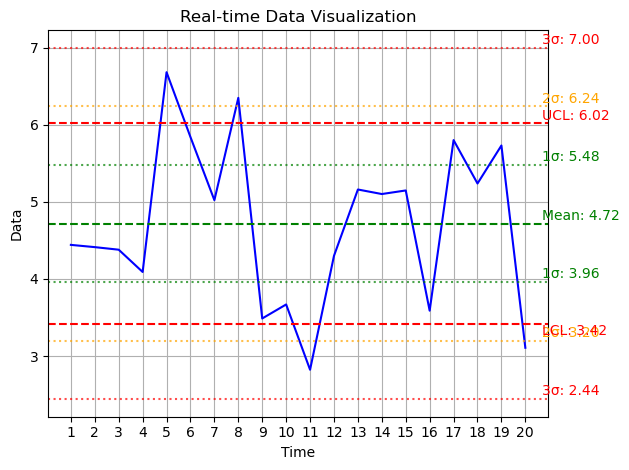

+--------------+---------+-------+-------+---------+--------+
| Data Point   |   Value |   UCL |   LCL |   Sigma |   Mean |
+==============+=========+=======+=======+=========+========+
| Data 1       |    4.44 |  6.02 |  3.42 |    0.76 |   4.44 |
+--------------+---------+-------+-------+---------+--------+
| Data 2       |    4.41 |  6.02 |  3.42 |    0.76 |   4.43 |
+--------------+---------+-------+-------+---------+--------+
| Data 3       |    4.38 |  6.02 |  3.42 |    0.76 |   4.41 |
+--------------+---------+-------+-------+---------+--------+
| Data 4       |    4.09 |  6.02 |  3.42 |    0.76 |   4.33 |
+--------------+---------+-------+-------+---------+--------+
| Data 5       |    6.68 |  6.02 |  3.42 |    0.76 |   4.8  |
+--------------+---------+-------+-------+---------+--------+
| Data 6       |    5.84 |  6.02 |  3.42 |    0.76 |   4.98 |
+--------------+---------+-------+-------+---------+--------+
| Data 7       |    5.02 |  6.02 |  3.42 |    0.76 |   4.98 |
+-------

In [333]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from tabulate import tabulate

# Function to generate random data from a normal distribution
def generate_data(mean, std_dev):
    return np.random.normal(mean, std_dev)

# Function to calculate UCL and LCL for a given data point
def calculate_ucl_lcl(data_point, mean, std_dev):
    A2 = 1.880  # Control chart constant for sample size 2

    sigma = std_dev / np.sqrt(2)  # Estimated standard deviation for sample size 2

    UCL = mean + 1.3
    LCL = mean - 1.3

    return round(UCL, 2), round(LCL, 2), round(sigma, 2)

def check_control_rules(data):
    global UCL, LCL

    rules_violated = np.zeros(len(data), dtype=bool)
    violated_rules = []

    # Rule 1: Points outside control limits
    for i in range(len(data)):
        if data[i] > UCL or data[i] < LCL:
            rules_violated[i] = True
            if np.any(rules_violated[i]): 
                violated_rules.append(f'R1 {i}')
                print(f'Rule 1: Points outside control limits triggered at index {i}: {data[i]}')

    # Rule 2: 9 consecutive points on the same side of the mean
    for i in range(len(data) - 8):
        if np.all(data[i:i+9] > mean) or np.all(data[i:i+9] < mean):
            rules_violated[i:i+9] = True
            if np.any(rules_violated[i:i+9]): 
                violated_rules.append(f'R2 {i}')
                print(f'Rule 2 : 9 consecutive points on the same side of the mean triggered at index {i}: {data[i:i+9]}')
                
    # Rule 3: 6 consecutive points increasing or decreasing
    for i in range(len(data) - 5):
        if np.all(np.diff(data[i:i+6]) > 0) or np.all(np.diff(data[i:i+6]) < 0):
            rules_violated[i:i+6] = True
            if np.any(rules_violated[i:i+6]): 
                violated_rules.append(f'R3 {i}')
                print(f'Rule 3 : 6 consecutive points increasing or decreasing triggered at index {i}: {data[i:i+6]}')

    # Rule 4: 14 consecutive alternating points
    for i in range(len(data) - 13):
        if np.all(np.diff(data[i:i+15] > 0) != np.diff(data[i:i+15] < 0)):
            rules_violated[i:i+15] = True
            if np.any(rules_violated[i:i+15]): 
                violated_rules.append(f'R4: {i}')
                print(f'Rule 4 : 4 consecutive alternating points triggered at index {i}: {data[i:i+15]}')


    # Rule 5: 2 consecutive points beyond 2 sigmas
    for i in range(len(data) - 1):
        if np.abs(data[i] - mean) > 2 * std_dev and np.abs(data[i+1] - mean) > 2 * std_dev:
            rules_violated[i:i+2] = True
            if np.any(rules_violated[i:i+2]): 
                violated_rules.append(f'R5 {i}')
                print(f'Rule 5: 2 consecutive points beyond 2 sigmas triggered at index {i}: {data[i:i+2]}')

     # Rule 6: 4 consecutive points beyond 1 sigma
    for i in range(len(data) - 3):
        if np.all(np.abs(data[i:i+4] - mean) > std_dev):
            rules_violated[i:i+4] = True
            if np.any(rules_violated[i:i+4]): 
                violated_rules.append(f'R6 {i}')
                print(f'Rule 6: 4 consecutive points beyond 1 sigma triggered at index {i}: {data[i:i+4]}')
   

    # Rule 7: 15 consecutive points in Zone A
    # for i in range(len(data) - 14):
    #     if np.all(np.abs(data[i:i+15] - mean) <= 2 * std_dev) and not np.any(np.abs(data[i:i+15] - mean) > std_dev):
    #         rules_violated[i:i+15] = True
    #         if np.any(rules_violated[i:i+15]):
    #             violated_rules.append(f'R7 {i}')
    #             print(f'Rule 7: 15 consecutive points in Zone A triggered at index {i}: {data[i:i+15]}')


    return violated_rules



# Function to update and display the plot in real-time
def update_plot(data_points, mean, std_dev):
    num_data_points = len(data_points)
    x_data = np.arange(1, num_data_points + 1)
    y_data = np.array(data_points)
    data_mean = np.mean(data_points)
    data_std_dev = np.std(data_points, ddof=1)

    # Calculate UCL, LCL, and sigma for each data point
    UCL, LCL, sigma = calculate_ucl_lcl(data_points[-1], data_mean, data_std_dev)
    UCLs = [UCL] * num_data_points
    LCLs = [LCL] * num_data_points
    sigmas = [round(calculate_ucl_lcl(data_points[:i+1], data_mean, data_std_dev)[2], 2) for i in range(num_data_points)]
    means = [round(np.mean(data_points[:i+1]), 2) for i in range(num_data_points)]
    last_mean = means[-1]
    last_sigma = sigmas[-1]

    plt.plot(x_data, y_data, 'b-')
    plt.axhline(UCL, color='r', linestyle='--', label='UCL')
    plt.axhline(LCL, color='r', linestyle='--', label='LCL')
    plt.axhline(last_mean, color='g', linestyle='--', label=f'Mean: {last_mean:.2f}')
    plt.axhline(last_mean + last_sigma, color='g', linestyle=':', alpha=0.7)
    plt.axhline(last_mean - last_sigma, color='g', linestyle=':', alpha=0.7)
    plt.axhline(last_mean + 2*last_sigma, color='orange', linestyle=':', alpha=0.7)
    plt.axhline(last_mean - 2*last_sigma, color='orange', linestyle=':', alpha=0.7)
    plt.axhline(last_mean + 3*last_sigma, color='r', linestyle=':', alpha=0.7)
    plt.axhline(last_mean - 3*last_sigma, color='r', linestyle=':', alpha=0.7)

    # Add text annotation for mean 
    plt.text(num_data_points + 0.7, last_mean + 0.1, f'Mean: {last_mean:.2f}', ha='left', va='center', color='g')

    # Add text annotation for 1σ
    plt.text(num_data_points + 0.7, last_mean + last_sigma + 0.1, f'1σ: {last_mean + last_sigma:.2f}', ha='left', va='center', color='g')
    plt.text(num_data_points + 0.7, last_mean - last_sigma + 0.1, f'1σ: {last_mean - last_sigma:.2f}', ha='left', va='center', color='g')

    # Add text annotation for 2σ
    plt.text(num_data_points + 0.7, last_mean + 2*last_sigma + 0.1, f'2σ: {last_mean + 2*last_sigma:.2f}', ha='left', va='center', color='orange')
    plt.text(num_data_points + 0.7, last_mean - 2*last_sigma + 0.1, f'2σ: {last_mean - 2*last_sigma:.2f}', ha='left', va='center', color='orange')

    # Add text annotation for 3σ
    plt.text(num_data_points + 0.7, last_mean + 3*last_sigma + 0.1, f'3σ: {last_mean + 3*last_sigma:.2f}', ha='left', va='center', color='r')
    plt.text(num_data_points + 0.7, last_mean - 3*last_sigma + 0.1, f'3σ: {last_mean - 3*last_sigma:.2f}', ha='left', va='center', color='r')

    # Add text annotation for UCL and LCL
    plt.text(num_data_points + 0.7, UCL + 0.1, f'UCL: {UCL:.2f}', ha='left', va='center', color='r')
    plt.text(num_data_points + 0.7, LCL - 0.1, f'LCL: {LCL:.2f}', ha='left', va='center', color='r')

    
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title('Real-time Data Visualization')
    plt.xticks(x_data)
    plt.grid(True)
    # plt.legend(loc='upper right')
    plt.tight_layout()  # Ensures that the text annotations do not overlap with the plot
    plt.show()

    # Print the data points, UCL, LCL, sigma, and means in a table
    table_data = [[f'Data {i+1}', round(data_points[i], 2), UCL, LCL, sigmas[i], means[i]] for i in range(num_data_points-1)]
    print(tabulate(table_data, headers=['Data Point', 'Value', 'UCL', 'LCL', 'Sigma', 'Mean'], tablefmt='grid'))

# Set the number of data points to display and the mean and standard deviation for the normal distribution
num_data_points = 20
mean = 5.0
std_dev = 1

# Create an empty list to store the data points
data_points = []

# Create the animation loop
for i in range(num_data_points):
    new_data_point = generate_data(mean, std_dev)
    data_points.append(new_data_point)
    update_plot(data_points, mean, std_dev)
    time.sleep(2)
    clear_output(wait=True)

# Close the final plot after the loop ends
plt.close()


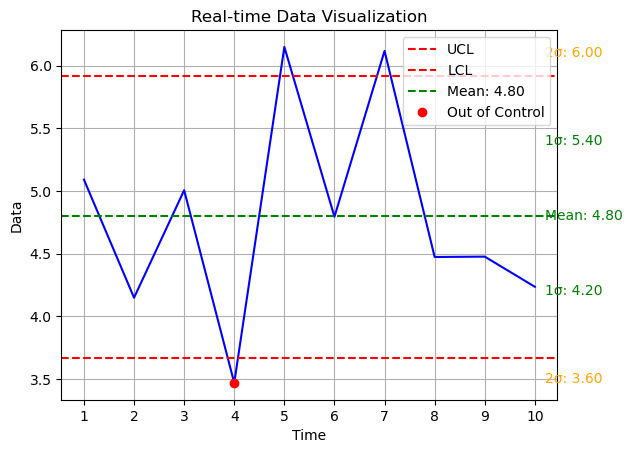

+--------------+---------+-------+-------+---------+--------+
| Data Point   |   Value |   UCL |   LCL |   Sigma |   Mean |
+==============+=========+=======+=======+=========+========+
| Data 1       |    5.09 |  5.92 |  3.67 |     0.6 |   5.09 |
+--------------+---------+-------+-------+---------+--------+
| Data 2       |    4.15 |  5.92 |  3.67 |     0.6 |   4.62 |
+--------------+---------+-------+-------+---------+--------+
| Data 3       |    5.01 |  5.92 |  3.67 |     0.6 |   4.75 |
+--------------+---------+-------+-------+---------+--------+
| Data 4       |    3.47 |  5.92 |  3.67 |     0.6 |   4.43 |
+--------------+---------+-------+-------+---------+--------+
| Data 5       |    6.15 |  5.92 |  3.67 |     0.6 |   4.77 |
+--------------+---------+-------+-------+---------+--------+
| Data 6       |    4.79 |  5.92 |  3.67 |     0.6 |   4.78 |
+--------------+---------+-------+-------+---------+--------+
| Data 7       |    6.12 |  5.92 |  3.67 |     0.6 |   4.97 |
+-------

In [335]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from tabulate import tabulate

# Function to generate random data from a normal distribution
def generate_data(mean, std_dev):
    return np.random.normal(mean, std_dev)

# Function to calculate UCL and LCL for a given data point
def calculate_ucl_lcl(data_point, mean, std_dev):
    A2 = 1.880  # Control chart constant for sample size 2

    sigma = std_dev / np.sqrt(2)  # Estimated standard deviation for sample size 2

    UCL = mean + A2 * sigma
    LCL = mean - A2 * sigma

    return round(UCL, 2), round(LCL, 2), round(sigma, 2)

# Function to check control rules
def check_control_rules(data):
    global UCL, LCL, mean, std_dev

    rules_violated = np.zeros(len(data), dtype=bool)
    violated_rules = []

    # Rule 1: Points outside control limits
    for i in range(len(data)):
        if data[i] > UCL or data[i] < LCL:
            rules_violated[i] = True
            if np.any(rules_violated[i]): 
                violated_rules.append(f'R1 {i}')
    
    return violated_rules

# Function to update and display the plot in real-time
def update_plot(data_points, mean, std_dev):
    num_data_points = len(data_points)
    x_data = np.arange(1, num_data_points + 1)
    y_data = np.array(data_points)
    data_mean = np.mean(data_points)
    data_std_dev = np.std(data_points, ddof=1)

    # Calculate UCL, LCL, and sigma for each data point
    UCL, LCL, sigma = calculate_ucl_lcl(data_points[-1], data_mean, data_std_dev)
    UCLs = [UCL] * num_data_points
    LCLs = [LCL] * num_data_points
    sigmas = [round(calculate_ucl_lcl(data_points[:i+1], data_mean, data_std_dev)[2], 2) for i in range(num_data_points)]
    means = [round(np.mean(data_points[:i+1]), 2) for i in range(num_data_points)]
    last_mean = means[-1]
    last_sigma = sigmas[-1]

    # Check control rules
    violated_rules = check_control_rules(data_points)
    rules_violated = np.zeros(len(data_points), dtype=bool)
    for rule in violated_rules:
        rule_idx = int(rule.split()[1])
        rules_violated[rule_idx] = True

    # Plot data points and control limits
    plt.plot(x_data, y_data, 'b-')
    plt.axhline(UCL, color='r', linestyle='--', label='UCL')
    plt.axhline(LCL, color='r', linestyle='--', label='LCL')
    plt.axhline(last_mean, color='g', linestyle='--', label=f'Mean: {last_mean:.2f}')

    # Plot points violating control rules in red
    plt.plot(x_data[rules_violated], y_data[rules_violated], 'ro', label='Out of Control')

    # Add text annotation for mean 
    plt.text(num_data_points + 0.2, last_mean, f'Mean: {last_mean:.2f}', ha='left', va='center', color='g')

    # Add text annotation for 1σ
    plt.text(num_data_points + 0.2, last_mean + last_sigma, f'1σ: {last_mean + last_sigma:.2f}', ha='left', va='center', color='g')
    plt.text(num_data_points + 0.2, last_mean - last_sigma, f'1σ: {last_mean - last_sigma:.2f}', ha='left', va='center', color='g')

    # Add text annotation for 2σ (change color to orange)
    plt.text(num_data_points + 0.2, last_mean + 2*last_sigma + 0.1, f'2σ: {last_mean + 2*last_sigma:.2f}', ha='left', va='center', color='orange')
    plt.text(num_data_points + 0.2, last_mean - 2*last_sigma - 0.1, f'2σ: {last_mean - 2*last_sigma:.2f}', ha='left', va='center', color='orange')

    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title('Real-time Data Visualization')
    plt.xticks(x_data)
    plt.grid(True)
    plt.legend()
    plt.show()

    # Print the data points, UCL, LCL, sigma, and means in a table
    table_data = [[f'Data {i+1}', round(data_points[i], 2), UCL, LCL, sigmas[i], means[i]] for i in range(num_data_points)]
    print(tabulate(table_data, headers=['Data Point', 'Value', 'UCL', 'LCL', 'Sigma', 'Mean'], tablefmt='grid'))

# Set the number of data points to display and the mean and standard deviation for the normal distribution
num_data_points = 10
mean = 5.0
std_dev = 1.0

# Create an empty list to store the data points
data_points = []

# Create the animation loop
for i in range(num_data_points):
    new_data_point = generate_data(mean, std_dev)
    data_points.append(new_data_point)
    update_plot(data_points, mean, std_dev)
    time.sleep(2)
    clear_output(wait=True)

# Close the final plot after the loop ends
plt.close()


In [347]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from tabulate import tabulate

# Function to generate random data from a normal distribution
def generate_data(mean, std_dev):
    return np.random.normal(mean, std_dev)

# Function to calculate UCL and LCL for a given data point
def calculate_ucl_lcl(data_point, mean, std_dev):
    UCL = mean + 2 * std_dev  # Upper Control Limit
    LCL = mean - 2 * std_dev  # Lower Control Limit
    return round(UCL, 2), round(LCL, 2)

# Function to check control rules
def check_control_rules(data, mean, std_dev):
    UCL, LCL = calculate_ucl_lcl(data[-1], mean, std_dev)

    rules_violated = np.zeros(len(data), dtype=bool)
    violated_rules = []

    # Rule 1: Points outside control limits
    for i in range(len(data)):
        if data[i] > UCL or data[i] < LCL:
            rules_violated[i] = True
            violated_rules.append(f'R1 {i}')

    return violated_rules

# Function to update and display the plot in real-time
def update_plot(data_points, mean, std_dev):
    num_data_points = len(data_points)
    x_data = np.arange(1, num_data_points + 1)
    y_data = np.array(data_points)
    data_mean = np.mean(data_points)
    data_std_dev = np.std(data_points, ddof=1)

    # Calculate UCL and LCL for each data point
    UCL, LCL = calculate_ucl_lcl(data_points[-1], data_mean, data_std_dev)

    # Plot data points and control limits
    plt.plot(x_data, y_data, 'b-')
    plt.axhline(UCL, color='r', linestyle='--', label='UCL')
    plt.axhline(LCL, color='r', linestyle='--', label='LCL')
    plt.axhline(data_mean, color='g', linestyle='--', label=f'Mean: {data_mean:.2f}')

    # Plot points violating control rules in red
    violated_rules = check_control_rules(data_points, data_mean, data_std_dev)
    rules_violated = np.zeros(len(data_points), dtype=bool)
    for rule in violated_rules:
        rule_idx = int(rule.split()[1])
        rules_violated[rule_idx] = True
    plt.plot(x_data[rules_violated], y_data[rules_violated], 'ro', label='Out of Control')

    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title('Real-time Data Visualization')
    plt.xticks(x_data)
    plt.grid(True)
    plt.legend()
    plt.show()

    # Print the data points, UCL, LCL, and mean in a table
    table_data = [[f'Data {i+1}', round(data_points[i], 2), UCL, LCL, round(data_mean, 2)] for i in range(num_data_points)]
    print(tabulate(table_data, headers=['Data Point', 'Value', 'UCL', 'LCL', 'Mean'], tablefmt='grid'))

# Set the number of data points to display and the mean and standard deviation for the normal distribution
num_data_points = 10
mean = 5.0
std_dev = 1.0

# Create an empty list to store the data points
data_points = []

# Create the animation loop
for i in range(num_data_points):
    new_data_point = generate_data(mean, std_dev)
    data_points.append(new_data_point)
    update_plot(data_points, mean, std_dev)
    time.sleep(2)
    clear_output(wait=True)

# Test the control rules once all data points are displayed
violated_rules = check_control_rules(data_points, mean, std_dev)
print("Violated Rules:", violated_rules)

# Close the final plot after the loop ends
# plt.close()


Violated Rules: ['R1 6']


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from tabulate import tabulate

# Function to generate random data from a normal distribution
def generate_data(mean, std_dev):
    return np.random.normal(mean, std_dev)

# Function to calculate UCL and LCL for a given data point
def calculate_ucl_lcl(data_point, mean, std_dev):
    UCL = mean + 2 * std_dev  # Upper Control Limit
    LCL = mean - 2 * std_dev  # Lower Control Limit
    return round(UCL, 2), round(LCL, 2)

# Function to check control rules
def check_control_rules(data, mean, std_dev):
    UCL, LCL = calculate_ucl_lcl(data[-1], mean, std_dev)

    rules_violated = np.zeros(len(data), dtype=bool)
    violated_rules = []

    # Rule 1: Points outside control limits
    for i in range(len(data)):
        if data[i] > UCL or data[i] < LCL:
            rules_violated[i] = True
            violated_rules.append(f'R1 {i}')

    return violated_rules

# Function to update and display the plot in real-time
def update_plot(data_points, mean, std_dev):
    num_data_points = len(data_points)
    x_data = np.arange(1, num_data_points + 1)
    y_data = np.array(data_points)
    data_mean = np.mean(data_points)
    data_std_dev = np.std(data_points, ddof=1)

    # Calculate UCL and LCL for each data point
    UCL, LCL = calculate_ucl_lcl(data_points[-1], data_mean, data_std_dev)

    # Plot data points and control limits
    plt.plot(x_data, y_data, 'b-')
    plt.axhline(UCL, color='r', linestyle='--', label='UCL')
    plt.axhline(LCL, color='r', linestyle='--', label='LCL')
    plt.axhline(data_mean, color='g', linestyle='--', label=f'Mean: {data_mean:.2f}')

    # Plot points violating control rules in red
    violated_rules = check_control_rules(data_points, data_mean, data_std_dev)
    rules_violated = np.zeros(len(data_points), dtype=bool)
    for rule in violated_rules:
        rule_idx = int(rule.split()[1])
        rules_violated[rule_idx] = True
    plt.plot(x_data[rules_violated], y_data[rules_violated], 'ro', label='Out of Control')

    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title('Real-time Data Visualization')
    plt.xticks(x_data)
    plt.grid(True)
    plt.legend()
    plt.pause(0.1)
    plt.clf()  # Clear the current figure for the next update

    # Print the data points, UCL, LCL, and mean in a table
    table_data = [[f'Data {i+1}', round(data_points[i], 2), UCL, LCL, round(data_mean, 2)] for i in range(num_data_points)]
    print(tabulate(table_data, headers=['Data Point', 'Value', 'UCL', 'LCL', 'Mean'], tablefmt='grid'))

# Set the number of data points to display and the mean and standard deviation for the normal distribution
num_data_points = 10
mean = 5.0
std_dev = 1.0

# Create an empty list to store the data points
data_points = []

# Create the animation loop
for i in range(num_data_points):
    new_data_point = generate_data(mean, std_dev)
    data_points.append(new_data_point)
    update_plot(data_points, mean, std_dev)
    time.sleep(2)
    clear_output(wait=True)

# Test the control rules once all data points are displayed
violated_rules = check_control_rules(data_points, mean, std_dev)
print("Violated Rules:", violated_rules)

# Display the final plot
plt.show()


Violated Rules: []


<Figure size 640x480 with 0 Axes>

In [356]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.animation import FuncAnimation
from tabulate import tabulate

# Function to generate random data from a normal distribution
def generate_data(mean, std_dev):
    return np.random.normal(mean, std_dev)

# Function to calculate UCL and LCL for a given data point
def calculate_ucl_lcl(data_point, mean, std_dev):
    UCL = mean + 2 * std_dev  # Upper Control Limit
    LCL = mean - 2 * std_dev  # Lower Control Limit
    return round(UCL, 2), round(LCL, 2)

# Function to check control rules
def check_control_rules(data, mean, std_dev):
    UCL, LCL = calculate_ucl_lcl(data[-1], mean, std_dev)

    rules_violated = np.zeros(len(data), dtype=bool)
    violated_rules = []

    # Rule 1: Points outside control limits
    for i in range(len(data)):
        if data[i] > UCL or data[i] < LCL:
            rules_violated[i] = True
            violated_rules.append(f'R1 {i}')

    return violated_rules

# Function to update the plot in real-time
def update_plot(i):
    new_data_point = generate_data(mean, std_dev)
    data_points.append(new_data_point)
    
    num_data_points = len(data_points)
    x_data = np.arange(1, num_data_points + 1)
    y_data = np.array(data_points)
    data_mean = np.mean(data_points)
    data_std_dev = np.std(data_points, ddof=1)

    # Calculate UCL and LCL for each data point
    UCL, LCL = calculate_ucl_lcl(data_points[-1], data_mean, data_std_dev)

    # Clear the current figure
    plt.clf()

    # Plot data points and control limits
    plt.plot(x_data, y_data, 'b-')
    plt.axhline(UCL, color='r', linestyle='--', label='UCL')
    plt.axhline(LCL, color='r', linestyle='--', label='LCL')
    plt.axhline(data_mean, color='g', linestyle='--', label=f'Mean: {data_mean:.2f}')

    # Plot points violating control rules in red
    violated_rules = check_control_rules(data_points, data_mean, data_std_dev)
    rules_violated = np.zeros(len(data_points), dtype=bool)
    for rule in violated_rules:
        rule_idx = int(rule.split()[1])
        rules_violated[rule_idx] = True
    plt.plot(x_data[rules_violated], y_data[rules_violated], 'ro', label='Out of Control')

    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title('Real-time Data Visualization')
    plt.xticks(x_data)
    plt.grid(True)
    plt.legend()

    # Print the data points, UCL, LCL, and mean in a table
    table_data = [[f'Data {i+1}', round(data_points[i], 2), UCL, LCL, round(data_mean, 2)] for i in range(num_data_points)]
    print(tabulate(table_data, headers=['Data Point', 'Value', 'UCL', 'LCL', 'Mean'], tablefmt='grid'))

# Set the number of data points to display and the mean and standard deviation for the normal distribution
num_data_points = 10
mean = 5.0
std_dev = 1.0

# Create an empty list to store the data points
data_points = []

# Create the animation
ani = FuncAnimation(plt.gcf(), update_plot, interval=2000, repeat=False)

# Display the animation
display(plt.gcf())


/Users/gradlon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<Figure size 640x480 with 0 Axes>